In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

#importing titanic dataset
titanicdata = pd.read_csv(r"C:\Users\yaswa\OneDrive\Desktop\train.csv")
#Displaying first 20 lines of the dataset
titanicdata.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#Printing the total number of passengers
print("Total number of passengers: "+str(len(titanicdata.index)))


Total number of passengers: 891


In [3]:
#checking number of null values
titanicdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#dropping all NaN values
titanicdata.dropna(inplace=True)
titanicdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
#Assigning dummy values to certain columns to make them easier to work with
gender = pd.get_dummies(titanicdata['Sex'], drop_first=True)
gender.head(5)

,male
1,0
3,0
6,1
10,0
11,0


In [6]:
embark = pd.get_dummies(titanicdata['Embarked'],drop_first=True)
embark.head(5)

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [7]:
pc = pd.get_dummies(titanicdata['Pclass'],drop_first=True)
pc.head(5)

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [8]:
#obtaining new dataset with assigned dummy values
titanicdata = pd.concat([titanicdata,gender,embark,pc],axis=1)
titanicdata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [9]:
#dropping irrelevant columns
titanicdata.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace=True)
titanicdata.head(5)

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,1,38.0,1,0,71.2833,C85,0,0,0,0,0
3,1,35.0,1,0,53.1000,C123,0,0,1,0,0
6,0,54.0,0,0,51.8625,E46,1,0,1,0,0
10,1,4.0,1,1,16.7000,G6,0,0,1,0,1
11,1,58.0,0,0,26.5500,C103,0,0,1,0,0


In [10]:
#Considering two inputs and one output to perform logistic regression on
#x1 is gender: male = 1 and female = 0
x1 = np.array(titanicdata["male"])

#x2 is age 
x2 = np.array(titanicdata["Age"])

#y (output) is whether the individual survived(survived = 1 and didn't survive=0)
y = np.array(titanicdata["Survived"])


In [11]:
#alpha is the learning rate
alpha = 0.3
#considering the coefficients for 1, x1 and x2 as b0, b1 and b2 respectively
#initializing all the coefficients to 0
b0 = 0
b1 = 0
b2 = 0

#predicting the new value using sigmoid function and improving the coefficients
for i in range(len(x1)):
    pred = 1/(1+math.exp(-(b0+(b1*x1[i])+(b2*x2[i]))))
    b0 = b0 + alpha*(y[i]-pred)*pred*(1-pred)*1
    b1 = b1 + alpha*(y[i]-pred)*pred*(1-pred)*x1[i]
    b2 = b2 + alpha*(y[i]-pred)*pred*(1-pred)*x2[i]
print(b0,b1,b2)


0.02936639815552994 0.02048410342057212 1.388390760004685


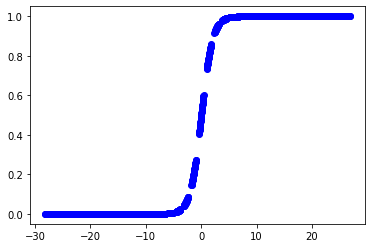

In [12]:
#Calculating corresponding probabilities for random test data points

finalclasses = []
xvals = []
probvals = []

for j in range(-20,20):
    for k in range(-20,20):
        xval = b0+(b1*j)+(b2*k)
        xvals.append(xval)
        prob = 1/(1+math.exp(-xval))
        probvals.append(prob)
        if(prob<0.5):
            finalclasses.append(0)
        else:
            finalclasses.append(1)
        
    
plt.scatter(xvals,probvals, color ='blue')
#plt.plot(np.sort(xvals),np.sort(finalclasses),color='red')
plt.show()



In [13]:
gen = int(input("Enter 1 for male and 0 for female"))
age = float(input("Enter age"))
output = b0+b1*gen+b2*age
probtest = 1/(1+math.exp(-output))
print("Probability of survival ", probtest)

Enter 1 for male and 0 for female1
Enter age75
Probability of survival  1.0
